In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('hotel_booking.csv')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [77]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Stage 2 Data Preprocessing

[Stage 2] Final Project DS 23

Periode : 15 - 21 Agustus

Halo teman-teman! Setelah menemukan insight, dan visualiasi dari dataset yang dipilih, kini saatnya teman-teman masuk ke dalam proses Data Pre-Processing untuk menentukan :
1. Apakah sudah melakukan pengecekkan data bermasalah seperti missing values, invalid values, atau data duplicate dan sudah membersihkannya?
2. Apakah sudah menentukan feature apa saja yang akan digunakan, atau perlu ditambahkan, dan reformatting feature sesuai dengan kebutuhan?

Penting! Saat memanipulasi data, mohon dilakukan dengan alasan yang jelas, dan tidak melakukan penambahan feature baru tapi tidak ada alasan yang mendasari langkah tersebut diperlukan.

Silahkan selesaikan dan kumpulkan dokumen Stage 2 tersebut (Notulen Mentoring, Source Code, Laporan Project) ke link gdrive yang sudah disiapkan (akan diinfokan secara personal ke masing-masing tim), paling lambat tanggal 21 Agustus 2022 pukul 23:59

# Buat Dataset untuk hasil Preprocessing

In [78]:
df_clean = df.copy()
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Cek data duplicate

Mengecek apakah terdapat data yang duplikat dilihat dari kolom `name`, `email`, `arrival_date_year`, `arrival_date_month`, `arrival_date_day_of_month` 

In [79]:
df.duplicated(subset=['name', 'email', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']).sum()

0

# Hotel

Perlu dilakukan OHE pada kolom Hotel dengan merubah setiap nilai kolom menjadi kolom baru dengan nilai biner yaitu 0 atau 1. Penggunaan OHE ini karena kolom Hotel tidak memiliki urutan/tingkatan. Dimana Resort hotel dilambangkan 1 dan City hotel dilambangkan 0.

In [80]:
# OHE
hotel_ohe = pd.get_dummies(df.hotel,drop_first=True)
# Gabungkan hasil OHE ke dataset
df_clean = df_clean.join(hotel_ohe)
# Hapus kolom `hotel`
df_clean = df_clean.drop('hotel', axis=1)


df_clean.head(1)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Resort Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,...,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,1


# Lead Time

Mengeluarkan Outlier di Lead time

In [81]:
# Batas atas dan bawah lead_time
lead_time_Q1 = df['lead_time'].quantile(0.25)
lead_time_Q3 = df['lead_time'].quantile(0.75)
lead_time_IQR = lead_time_Q3 - lead_time_Q1
lead_time_low_limit = lead_time_Q1 - (lead_time_IQR * 1.5)
lead_time_high_limit = lead_time_Q3 + (lead_time_IQR * 1.5)

print(lead_time_IQR)
print(lead_time_low_limit)
print(lead_time_high_limit)

142.0
-195.0
373.0


In [82]:
df_clean = df_clean[ (df_clean['lead_time']>=0) & (df_clean['lead_time']<=373)]

# Arrival Date

## arrival_date_year, arrival_date_month, dan arrival_date_day_of_month

Membuat kolom `date` yang merupakan gabungan dari kolom `arrival_date_year`, `arrival_date_month`, dan `arrival_date_day_of_month`

Membuat kolom `is_weekend` untuk mendapatkan informasi mengenai tanggal arrival apakah di weekend atau weekdays

In [83]:
def month(x):
    if x['arrival_date_month'] == 'January':
            month = '1'
    elif x['arrival_date_month'] == 'February':
            month = '2'
    elif x['arrival_date_month'] == 'March':
            month = '3' 
    elif x['arrival_date_month'] =='April':
            month = '4'
    elif x['arrival_date_month'] == 'May':
            month = '5'    
    elif x['arrival_date_month'] == 'June':
            month = '6'
    elif x['arrival_date_month'] == 'July':
            month = '7'
    elif x['arrival_date_month'] == 'August':
            month = '8'
    elif x['arrival_date_month'] == 'September':
            month = '9'
    elif x['arrival_date_month'] == 'October':
            month = '10'
    elif x['arrival_date_month'] == 'November':
            month = '11'
    else:
            month = '12'
    return month

In [84]:
df_clean['month_number'] = df_clean.apply(lambda x: month(x), axis=1)
# merubah tahun dan hari menjadi string
df_clean["arrival_date_day_of_month"] = df_clean["arrival_date_day_of_month"].astype(str)
df_clean["arrival_date_year"] = df_clean["arrival_date_year"].astype(str)
# membuat kolom date of arrival
df_clean["date"] = pd.to_datetime(df_clean["arrival_date_year"] + "/" + df_clean["month_number"] + "/" + df_clean["arrival_date_day_of_month"])  

# menambahkan info tanggal weekend
df_clean["isWeekend"] = df_clean["date"].dt.weekday >= 5
def weekend(x):
    if x['isWeekend'] ==True:
            weekend = '1'
    else: 
            weekend = '0'
    return weekend
df_clean['is_weekend'] = df_clean.apply(lambda x: weekend(x), axis=1)


## Membuat kolom musim berdasarkan bulan pemesanan

In [85]:
def pembagian_musim(value):
    value = int(value)
    if value in [3, 4, 5]:
        return 'spring'
    elif value in [6, 7, 8]:
        return 'summer'
    elif value in [9, 10, 11]:
        return 'autumn'
    elif value in [2, 1, 12]:
        return 'winter'

In [86]:
df_clean['season'] = df_clean['month_number'].apply(pembagian_musim)

In [87]:
df_clean['season']

0         summer
2         summer
3         summer
4         summer
5         summer
           ...  
119385    summer
119386    summer
119387    summer
119388    summer
119389    summer
Name: season, Length: 116385, dtype: object

Membuat OHE untuk pembagian musim

In [88]:
season_ohe = pd.get_dummies(df_clean.season,drop_first=True, prefix='season')
df_clean = df_clean.join(season_ohe)

In [89]:
# Menghapus kolom yang tidak terpakai
df_clean = df_clean.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'isWeekend','date','month_number','season'], axis=1)

df_clean.head(1)

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,reservation_status_date,name,email,phone-number,credit_card,Resort Hotel,is_weekend,season_spring,season_summer,season_winter
0,0,342,27,0,0,2,0.0,0,BB,PRT,...,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,1,0,0,1,0


## arrival_date_week_number

Kolom `arrival_date_week_number` tidak diubah

In [90]:
# df_clean = df_clean.drop('arrival_date_week_number', axis=1)

# Stays

Akan dibuat kolom total_stay dari gabungan kolom stays_in_weekend_nights dan stays_in_week_nights

In [91]:
df_clean['total_stay'] = df_clean.apply(lambda x: (x['stays_in_weekend_nights']) + (x['stays_in_week_nights']), axis=1)
#hapus kolom stays_weekend dan weeknight
df_clean = df_clean.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1)

# Adults, children, dan babies

## Adults

In [92]:
df.adults.describe()

count    119390.000000
mean          1.856403
std           0.579261
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

Kolom adults memiliki nilai minimal 0, ini sebuah kesalahan dimana booking harus ada orang dewasa

In [93]:
df[df['adults']<1].shape

(403, 36)

Ada 403 baris yang memiliki nilai < 1

Drop baris dengan nilai dibawah 1

In [94]:
df_clean = df_clean[df_clean['adults']>0]
df_clean.shape

(115984, 36)

## Children, babies

Dilakukan penjumlahan antara kolom children dan babies menjadi kolom Kids, karena diasumsikan children dan babies masuk ke dalam kategori yang sama, yaitu kids. 

In [95]:
#Kolom children yang nilainya kosong diganti dengan 0.
df_clean.children = df_clean.children.fillna(0)

#Kolom kids (children dan babies)
df_clean['kids'] = df_clean.apply(lambda x: (x['children']) + (x['babies']), axis=1)

# Mengubah tipe data menjadi int
df_clean.kids = df_clean.kids.astype(int)

## Buat kolom baru Total guest dan is_have_kids

Buat kolom baru :
- `total_guest` : gabungan dari kolom `adults` dan `kids`
- `is_have_kids` : status apakah memiliki anak-anak atau tidak

In [96]:
df_clean['total_guest'] = df_clean['adults'] + df_clean['kids']

df_clean['is_have_kids']  = df_clean['kids'].apply(lambda x : 0 if x<1 else 1)

In [97]:
# Menghapus kolom yang tidak diperlukan
df_clean = df_clean.drop(['adults', 'children', 'babies', 'kids'], axis=1)

In [98]:
df_clean.head(1)

,is_canceled,lead_time,arrival_date_week_number,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,phone-number,credit_card,Resort Hotel,is_weekend,season_spring,season_summer,season_winter,total_stay,total_guest,is_have_kids
0,0,342,27,BB,PRT,Direct,Direct,0,0,0,...,669-792-1661,************4322,1,0,0,1,0,0,2,0


# Meal

Perlu dilakukan OHE pada kolom meal dengan merubah setiap nilai kolom menjadi kolom baru dengan nilai biner yaitu 0 atau 1. Penggunaan OHE ini karena kolom meal tidak memiliki urutan/tingkatan.

Value :
- BB : bed and breakfast
- HB : half board (breakfast and dinner included)
- FB : full board (breakfast, lunch, and dinner included)
- SC : self catering (no meals included)
- Undefined

In [99]:
df_clean.meal.value_counts()

BB           89654
HB           13821
SC           10542
Undefined     1169
FB             798
Name: meal, dtype: int64

Ubah value Undefined ke SC (no meals)

In [100]:
df_clean['meal'] = df_clean['meal'].apply(lambda x: 'SC' if x=='Undefined' else x)

In [101]:
df_clean.meal.value_counts()

BB    89654
HB    13821
SC    11711
FB      798
Name: meal, dtype: int64

In [102]:
meal_ohe = pd.get_dummies(df_clean.meal,drop_first=True, prefix='meal')
df_clean = df_clean.join(meal_ohe)

In [103]:
df_clean = df_clean.drop('meal', axis=1)

# Country

Dikarenakan terdapat banyak data country yang memungkinkan apabila digunakan untuk analisis, jumlah data negara PRT (Portugal) ... maka dikelompokkan data country menjadi 2 yaitu Portugal dan Non Portugal. Dimana Portugal diberi label 1 dan Non Portugal diberi label 0.

In [104]:
df_clean['country'].isnull().sum()

478

Mengubah nilai kosong pada kolom Country menjadi PRT

In [105]:
df_clean['country'] = df_clean['country'].fillna('PRT')

In [106]:
df_clean['country'].isnull().sum()

0

In [107]:
#Kolom country
df_clean['negara'] = df_clean.apply(lambda x: "Portugal" if (x['country'] == 'PRT') else "Others", axis=1)

In [108]:
df_clean.negara.value_counts()

Others      69142
Portugal    46842
Name: negara, dtype: int64

In [109]:
mapping_negara = {
    'Portugal' : 1,
    'Others' : 0,
}

Buat kolom `is_lokal` yang merupakan status apabila berasal dari lokal (portugal) atau tidak

In [110]:
df_clean['is_lokal'] = df_clean['negara'].map(mapping_negara)


In [111]:
# Hapus kolom Country
df_clean = df_clean.drop(['country', 'negara'], axis=1)

df_clean.head(1)

,is_canceled,lead_time,arrival_date_week_number,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,...,season_spring,season_summer,season_winter,total_stay,total_guest,is_have_kids,meal_FB,meal_HB,meal_SC,is_lokal
0,0,342,27,Direct,Direct,0,0,0,C,C,...,0,1,0,0,2,0,0,0,0,1


# Market_Segment

Kolom Market_Segment akan di drop karena redundant dengan kolom Distribution_Channel

In [112]:
df_clean = df_clean.drop('market_segment',axis=1)

# Distribution Channel

Di OHE

In [113]:
df_clean['distribution_channel'] = df_clean['distribution_channel'].apply(lambda x: 'Any' if x in ['GDS', 'Undefined'] else x)


In [114]:
dist_ohe = pd.get_dummies(df_clean.distribution_channel, drop_first=True, prefix='distribution')
df_clean = df_clean.join(dist_ohe)


In [115]:
df_clean = df_clean.drop('distribution_channel',axis=1)

# Is_repeated_guest

Kolom `is_repeated_guest` tidak diubah

In [116]:
df.is_repeated_guest.value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

# previous_cancellations

In [117]:
df.previous_cancellations.value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

Akan diubah valuenya:
- 0 > tidak pernah cancel
- 1 > pernah cancel 1x atau lebih

In [118]:
df_clean['previous_cancellations'] = df_clean['previous_cancellations'].apply(lambda x: 0 if x == 0 else 1)
df_clean['previous_cancellations'].value_counts()

0    109701
1      6283
Name: previous_cancellations, dtype: int64

# previous_bookings_not_canceled

Akan dihapus karena redundant dengan `previous_cancellations`

In [119]:
df.previous_bookings_not_canceled.value_counts()

0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

In [120]:
df_clean = df_clean.drop('previous_bookings_not_canceled', axis=1)

# Reserved_room_type dan assigned_room_type

Buat kolom `room_as_ordered` dari perbandingan kolom `reserved_room_type` dan `assigned_room_type`

In [121]:
df_clean['room_as_ordered'] = np.where(df_clean['reserved_room_type'] == df_clean['assigned_room_type'], 1, 0)

# Hapus kolom tidak terpakai
df_clean = df_clean.drop(['reserved_room_type', 'assigned_room_type'], axis=1)

df_clean.head(1)

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,booking_changes,deposit_type,agent,company,days_in_waiting_list,...,total_guest,is_have_kids,meal_FB,meal_HB,meal_SC,is_lokal,distribution_Corporate,distribution_Direct,distribution_TA/TO,room_as_ordered
0,0,342,27,0,0,3,No Deposit,NaN,NaN,0,...,2,0,0,0,0,1,0,1,0,1


# booking_changes

- Kolom booking_changes memiliki value numerical, akan tetapi untuk memudahkan maka diubah medengan menggunakan conditions dengan asumsi:
- Jika booking tidak ada perubahan makan = 0 maka dikategorikan sebagai 0, sedangkan jika customer perubahan booking >= 1 maka dikategorikan sebagai 1.

In [122]:
df['booking_changes'].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

In [123]:
df_clean['booking_changes'] = [0 if x == 0 else 1 for x in df_clean['booking_changes']]

# Deposit Type

Perlu dilakukan OHE pada kolom deposit_type dengan merubah setiap nilai kolom menjadi kolom baru dengan nilai biner yaitu 0 atau 1. Penggunaan OHE ini karena deposit_type dan tidak memiliki urutan/tingkatan.

In [124]:
deposit_ohe = pd.get_dummies(df_clean['deposit_type'], prefix='deposit_type',drop_first=True)
df_clean = df_clean.join(deposit_ohe)

# Hapus kolom tidak terpakai
df_clean = df_clean.drop('deposit_type', axis=1)

df_clean.head(1)

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,booking_changes,agent,company,days_in_waiting_list,customer_type,...,meal_FB,meal_HB,meal_SC,is_lokal,distribution_Corporate,distribution_Direct,distribution_TA/TO,room_as_ordered,deposit_type_Non Refund,deposit_type_Refundable
0,0,342,27,0,0,1,NaN,NaN,0,Transient,...,0,0,0,1,0,1,0,1,0,0


# Agent dan Company

Berisi id dari agent travel dan company

In [125]:
df_clean[['agent', 'company']]

,agent,company
0,NaN,NaN
2,NaN,NaN
3,304.0,NaN
4,240.0,NaN
5,240.0,NaN
...,...,...
119385,394.0,NaN
119386,9.0,NaN
119387,9.0,NaN
119388,89.0,NaN


In [126]:
df_clean[['agent', 'company']].isnull().sum()

agent       16115
company    109218
dtype: int64

Banyak nilai kosong pada kedua kolom

Karena berisi id, nilai kosong akan diubah menjadi 0

In [127]:
df_clean[['agent', 'company']] = df_clean[['agent', 'company']].fillna(0)

In [128]:
df_clean[['agent', 'company']].isnull().sum()

agent      0
company    0
dtype: int64

In [129]:
df_clean['agent'].value_counts()
df_clean['company'].value_counts()

0.0      109218
40.0        924
223.0       784
67.0        267
45.0        247
          ...  
142.0         1
32.0          1
11.0          1
487.0         1
376.0         1
Name: company, Length: 349, dtype: int64

Karena nilainya sangat beragam, kedua kolom akan dihapus

In [130]:
df_clean = df_clean.drop(['agent', 'company'], axis=1)

# Customer Type

Perlu dilakukan OHE pada kolom customer_type dengan merubah setiap nilai kolom menjadi kolom baru dengan nilai biner yaitu 0 atau 1. Penggunaan OHE ini karena customer_type tidak memiliki urutan/tingkatan.

In [131]:
customer_ohe = pd.get_dummies(df_clean['customer_type'], prefix='customer_type',drop_first=True)
df_clean = df_clean.join(customer_ohe)

# Hapus kolom tidak terpakai
df_clean = df_clean.drop('customer_type', axis=1)

df_clean.head(1)

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,...,is_lokal,distribution_Corporate,distribution_Direct,distribution_TA/TO,room_as_ordered,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,0,0,1,0,0.0,0,0,...,1,0,1,0,1,0,0,0,1,0


In [132]:
df.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

# lead_time

Menormalisasi lead_time dengan mengeluarkan Outlier

In [133]:
# Batas atas dan bawah lead_time
lead_time_Q1 = df['lead_time'].quantile(0.25)
lead_time_Q3 = df['lead_time'].quantile(0.75)
lead_time_IQR = lead_time_Q3 - lead_time_Q1
lead_time_low_limit = lead_time_Q1 - (lead_time_IQR * 1.5)
lead_time_high_limit = lead_time_Q3 + (lead_time_IQR * 1.5)

print(lead_time_IQR)
print(lead_time_low_limit)
print(lead_time_high_limit)

142.0
-195.0
373.0


In [134]:
# # Mengeluarkan lead_time outlier dan data 0 dan minus
# dfx=df.query("`lead_time` > 0")
# dfz=dfx.query("`lead_time` < 211")
# df[ (df['lead_time']<0) & (df['lead_time']>211)].value_counts()

In [135]:
df_clean = df_clean[ (df_clean['lead_time']>0) & (df_clean['lead_time']<373)]

In [136]:
df_clean.head(1)

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,...,is_lokal,distribution_Corporate,distribution_Direct,distribution_TA/TO,room_as_ordered,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,0,0,1,0,0.0,0,0,...,1,0,1,0,1,0,0,0,1,0


# Total_of_special_requests, required_car_parking_spaces, dan days_in_waiting_list

- Kolom total_of_special_requests, required_car_parking_spaces, dan days_in_waiting_list sudah memiliki value numerical, akan tetapi untuk memudahkan maka diubah medengan menggunakan conditions dengan asumsi:
- Jika customer memiliki permintaan khusus total_of_special_requests = 0 maka dikategorikan sebagai 0, sedangkan jika customer memiliki permintaan khusus >= 1 maka dikategorikan sebagai 1. Hal ini berlaku juga untuk kolom required_car_parking_spaces dan days_in_waiting_list.

In [137]:
df_clean['new_total_special_request'] = [0 if x == 0 else 1 for x in df_clean['total_of_special_requests']]

df_clean['new_required_car_parking_spaces'] = [0 if x == 0 else 1 for x in df_clean['required_car_parking_spaces']]

df_clean['new_days_in_waiting_list'] = [0 if x == 0 else 1 for x in df_clean['days_in_waiting_list']]


In [138]:
df['days_in_waiting_list'].value_counts()

0      115692
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [139]:
# Hapus kolom tidak terpakai
df_clean = df_clean.drop(['total_of_special_requests', 'required_car_parking_spaces', 'days_in_waiting_list'], axis=1)

df_clean.head(3)

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,booking_changes,adr,reservation_status,reservation_status_date,name,...,distribution_TA/TO,room_as_ordered,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,new_total_special_request,new_required_car_parking_spaces,new_days_in_waiting_list
0,0,342,27,0,0,1,0.0,Check-Out,2015-07-01,Ernest Barnes,...,0,1,0,0,0,1,0,0,0,0
2,0,7,27,0,0,0,75.0,Check-Out,2015-07-02,Rebecca Parker,...,0,0,0,0,0,1,0,0,0,0
3,0,13,27,0,0,0,75.0,Check-Out,2015-07-02,Laura Murray,...,0,1,0,0,0,1,0,0,0,0


# Reservation_status

Redundant dengan kolom `is_canceled`, akan dihapus

In [140]:
df_clean = df_clean.drop('reservation_status', axis=1)

# Reservation_status_date

Kolom akan di hapus

In [141]:
df_clean = df_clean.drop('reservation_status_date', axis=1)

# Name, email, phone-number, credit_card

Kolom akan dihapus karena nilai masing-masing kolom sangat unik

In [142]:
df_clean = df_clean.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1)

# Dataset akhir setelah Preprocessing

In [143]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109697 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   is_canceled                      109697 non-null  int64  
 1   lead_time                        109697 non-null  int64  
 2   arrival_date_week_number         109697 non-null  int64  
 3   is_repeated_guest                109697 non-null  int64  
 4   previous_cancellations           109697 non-null  int64  
 5   booking_changes                  109697 non-null  int64  
 6   adr                              109697 non-null  float64
 7   Resort Hotel                     109697 non-null  uint8  
 8   is_weekend                       109697 non-null  object 
 9   season_spring                    109697 non-null  uint8  
 10  season_summer                    109697 non-null  uint8  
 11  season_winter                    109697 non-null  uint8  
 12  to

In [144]:
df_clean.head()

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,booking_changes,adr,Resort Hotel,is_weekend,season_spring,...,distribution_TA/TO,room_as_ordered,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,new_total_special_request,new_required_car_parking_spaces,new_days_in_waiting_list
0,0,342,27,0,0,1,0.0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,7,27,0,0,0,75.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,13,27,0,0,0,75.0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,14,27,0,0,0,98.0,1,0,0,...,1,1,0,0,0,1,0,1,0,0
5,0,14,27,0,0,0,98.0,1,0,0,...,1,1,0,0,0,1,0,1,0,0


In [145]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<AxesSubplot:>

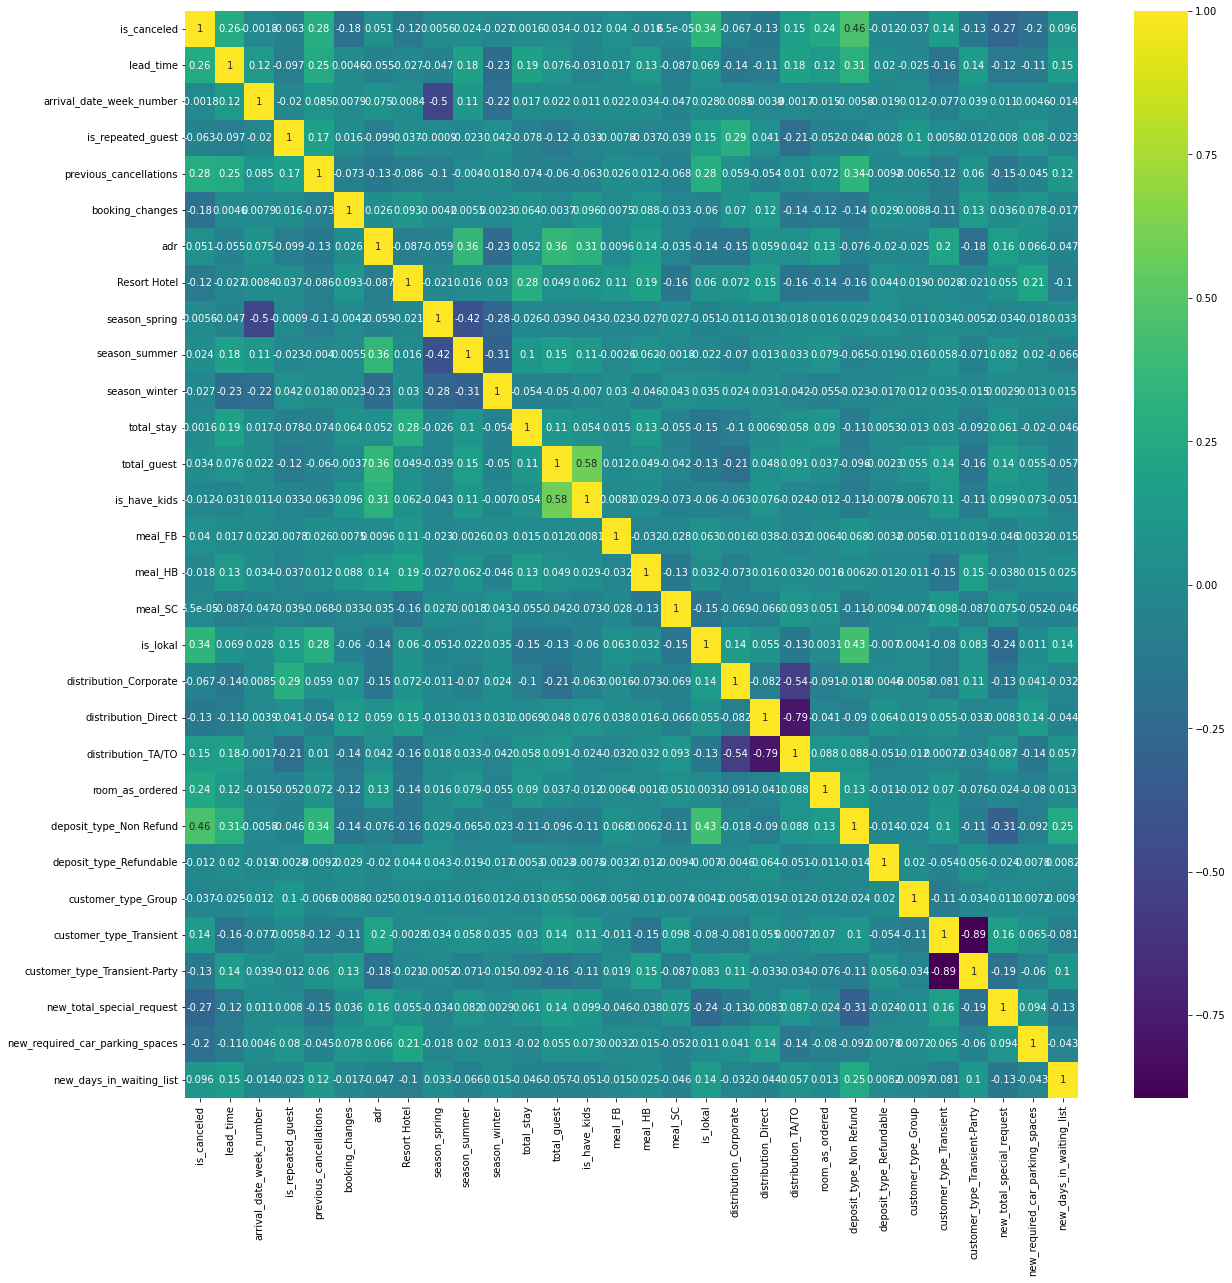

In [146]:
plt.figure(figsize=(20,20))
sns.heatmap(df_clean.corr(),annot=True,cmap='viridis')